In [278]:
import ast
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from pandas.core.frame import DataFrame as DF
from copy import copy as copy
import operator as operator
import pylab as pl
import itertools

# Show graphs in Notebook
%matplotlib inline

# linking to files in notebooks

from IPython.display import FileLink, FileLinks

# Plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
figsize(15, 15);

import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, datasets
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


C:\Users\acolonperez\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [279]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Show graphs in Notebook
%matplotlib inline

In [280]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [281]:
subjects=list(range(1,151));
for i in subjects:
    vars()['data_p' + str(i)] = pd.read_csv('/Users/acolonperez/Documents/Hilary_Term/Project_HuntLab/main_data/main_participants/p%s.csv' % i)

In [282]:
pd.options.display.max_colwidth = 1000

for i in subjects:
    print(i)
    print(vars()['data_p' + str(i)]['typedWord'].dropna())
    print(vars()['data_p' + str(i)]['typedWord_2'].dropna())

1
253     randomly picking mostly w and q and occasionally sample checking
Name: typedWord, dtype: object
Series([], Name: typedWord_2, dtype: float64)
2
253     I sampled as often as I needed to to confirm that I was choosing the highest value, only not sampling a balloon when I was confident it couldn't exceed the values I already knew.
Name: typedWord, dtype: object
253    I chose the balloon I either knew for sure or could deduce based on rates of change would have the highest value.
Name: typedWord_2, dtype: object
3
253     i used the strategy of looking at the speed of the balloon and gathering the amount of points per set to work out what would be best for me.
Name: typedWord, dtype: object
253    i used the strategy of working out what amount of points would be best for me
Name: typedWord_2, dtype: object
4
253    i just went with my gut feeling 
Name: typedWord, dtype: object
253    i used the same strategy during the choice rounds i went with my gut instinct
Name: typedWord_

In [283]:
# create empty dataframes
practice_data = pd.DataFrame(data=[])
main_data = pd.DataFrame(data=[])
survey_data = pd.DataFrame(data=[])

In [284]:
nr_trials = 150
subjects=list(range(1,151));
sample_keypresses1 = []
sample_rt1 = []
sample_keypresses2 = []
sample_rt2 = []
sample_keypresses3 = []
sample_rt3 = []
choice_keypresses = []
choice_rt = []
participants_all = []

for i in subjects:
    keypresses = vars()['data_p' + str(i)].loc[103:252, 'key_resp_21.sample1']
    keypresses_reix = keypresses.reset_index()
    RTs = vars()['data_p' + str(i)].loc[103:252, 'key_resp_21.rt1']
    RTs_reix = RTs.reset_index()
    sample_keypresses1.append(keypresses_reix['key_resp_21.sample1'])
    sample_rt1.append(RTs_reix)
    
    keypresses = vars()['data_p' + str(i)].loc[103:252, 'key_resp_21.sample2']
    keypresses_reix = keypresses.reset_index()
    RTs = vars()['data_p' + str(i)].loc[103:252, 'key_resp_21.rt2']
    RTs_reix = RTs.reset_index()
    sample_keypresses2.append(keypresses_reix['key_resp_21.sample2'])
    sample_rt2.append(RTs_reix)
    
    keypresses = vars()['data_p' + str(i)].loc[103:252, 'key_resp_21.sample3']
    keypresses_reix = keypresses.reset_index()
    RTs = vars()['data_p' + str(i)].loc[103:252, 'key_resp_21.rt3']
    RTs_reix = RTs.reset_index()
    sample_keypresses3.append(keypresses_reix['key_resp_21.sample3'])
    sample_rt3.append(RTs_reix)
        
    keypresses = vars()['data_p' + str(i)].loc[103:252, 'key_resp_34.keys']
    keypresses_reix = keypresses.reset_index()
    RTs = vars()['data_p' + str(i)].loc[103:252, 'key_resp_34.rt']
    RTs_reix = RTs.reset_index()
    choice_keypresses.append(keypresses_reix)
    choice_rt.append(RTs_reix)

    participant = [i] * len(RTs_reix)
    participants_all.append(participant)


main_data = pd.concat(sample_keypresses1)
#main_data.rename(columns={0:'sample_keypress'}, inplace=True )
main_data = main_data.drop(columns=["index"])
main_data = main_data.reset_index()
sample_keypresses_all1 = pd.concat(sample_keypresses1).reset_index()
sample_keypresses_all2 = pd.concat(sample_keypresses2).reset_index()
sample_keypresses_all3 = pd.concat(sample_keypresses3).reset_index()
sample_rt_all1 = pd.concat(sample_rt1).reset_index()
sample_rt_all2 = pd.concat(sample_rt2).reset_index()
sample_rt_all3 = pd.concat(sample_rt3).reset_index()
choice_keypresses_all = pd.concat(choice_keypresses).reset_index()
choice_rt_all = pd.concat(choice_rt).reset_index()

main_data['sample_rt1'] = sample_rt_all1['key_resp_21.rt1']

main_data['sample_keypress2'] = sample_keypresses_all2['key_resp_21.sample2']
main_data['sample_rt2'] = sample_rt_all2['key_resp_21.rt2']

main_data['sample_keypress3'] = sample_keypresses_all3['key_resp_21.sample3']
main_data['sample_rt3'] = sample_rt_all3['key_resp_21.rt3']


main_data['choice_keypress'] = choice_keypresses_all['key_resp_34.keys']
main_data['choice_rt'] = choice_rt_all['key_resp_34.rt']
main_data['participant'] = np.concatenate(participants_all)
main_data['trial']=main_data['index']
main_data = main_data.drop(columns=["index"])
#main_data['sample_keypress']=main_data[0]

In [285]:
main_data

,key_resp_21.sample1,sample_rt1,sample_keypress2,sample_rt2,sample_keypress3,sample_rt3,choice_keypress,choice_rt,participant,trial
0,NaN,4.435590,NaN,NaN,NaN,NaN,q,1.323765,1,0
1,NaN,0.899010,NaN,NaN,NaN,NaN,w,0.962150,1,1
2,NaN,0.669040,NaN,NaN,NaN,NaN,e,0.858875,1,2
3,q,1.542530,NaN,1.275055,NaN,NaN,w,2.201385,1,3
4,w,2.598455,e,0.676445,space,1.989015,e,1.185135,1,4
...,...,...,...,...,...,...,...,...,...,...
22495,q,1.377655,w,0.051755,e,0.332985,e,0.354805,150,145
22496,NaN,5.353235,NaN,NaN,NaN,NaN,q,0.436825,150,146
22497,NaN,16.033885,NaN,NaN,NaN,NaN,w,0.926355,150,147
22498,q,1.483630,w,0.501110,space,0.568395,w,1.058335,150,148


In [286]:
subjects=list(range(1,151));
reverse_order=[]
for i in subjects:
    order = vars()['data_p' + str(i)].loc[0, 'reverse_order']
    reverse_order.append(order)

print(reverse_order)

[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0]


In [287]:
subjects=list(range(1,151));
reverse_order=[]

for row, row_id in enumerate(main_data.values):
    for i in subjects:
        if main_data.loc[row, 'participant'] == i:
            main_data.loc[row,'reverse_order'] = vars()['data_p' + str(i)].loc[0, 'reverse_order']
            

In [289]:
main_data[20:30]

,key_resp_21.sample1,sample_rt1,sample_keypress2,sample_rt2,sample_keypress3,sample_rt3,choice_keypress,choice_rt,participant,trial,reverse_order
20,NaN,3.172435,NaN,NaN,NaN,NaN,q,0.385615,1,20,1.0
21,NaN,0.783745,NaN,NaN,NaN,NaN,q,0.420170,1,21,1.0
22,NaN,0.498815,NaN,NaN,NaN,NaN,w,0.905820,1,22,1.0
23,NaN,0.509310,NaN,NaN,NaN,NaN,e,0.917295,1,23,1.0
24,NaN,0.558525,NaN,NaN,NaN,NaN,e,2.568545,1,24,1.0
25,NaN,NaN,NaN,NaN,NaN,NaN,e,1.410650,1,25,1.0
26,NaN,0.612710,NaN,NaN,NaN,NaN,q,1.101910,1,26,1.0
27,NaN,0.648265,NaN,NaN,NaN,NaN,w,0.483835,1,27,1.0
28,NaN,0.530105,NaN,NaN,NaN,NaN,w,1.065575,1,28,1.0
29,NaN,0.546970,NaN,NaN,NaN,NaN,w,0.584880,1,29,1.0


In [290]:
balloon1 = data_p1.loc[103:252, 'balloon1']
balloon2 = data_p1.loc[103:252, 'balloon2']
balloon3 = data_p1.loc[103:252, 'balloon3']

main_balloon1 = pd.concat([balloon1]*len(subjects)).reset_index()
main_balloon2 = pd.concat([balloon2]*len(subjects)).reset_index()
main_balloon3 = pd.concat([balloon3]*len(subjects)).reset_index()

main_data['balloon1']=main_balloon1['balloon1']
main_data['balloon2']=main_balloon2['balloon2']
main_data['balloon3']=main_balloon3['balloon3']

In [291]:
reset = data_p1.loc[103:252, 'reset']
reveal = data_p1.loc[103:252, 'reveal']

main_reset = pd.concat([reset]*len(subjects)).reset_index()
main_reveal = pd.concat([reveal]*len(subjects)).reset_index()

main_data['reset']=main_reset['reset']
main_data['reveal']=main_reveal['reveal']

In [292]:
# value won
main_data['mean_val_gold'] = 0
main_data['points_won'] = 0
for row,row_id in enumerate(main_data.values):
    main_data.loc[row,'mean_val_gold'] = mean([main_data.loc[row,'balloon1'],main_data.loc[row,'balloon2'],main_data.loc[row,'balloon3']])

    if main_data.loc[row,'choice_keypress']=='q':
        main_data.loc[row,'points_won']=main_data.loc[row,'balloon1']
    elif main_data.loc[row,'choice_keypress']=='w':
        main_data.loc[row,'points_won']=main_data.loc[row,'balloon2']
    elif main_data.loc[row,'choice_keypress']=='e':
        main_data.loc[row,'points_won']=main_data.loc[row,'balloon3']

In [293]:
main_data

,key_resp_21.sample1,sample_rt1,sample_keypress2,sample_rt2,sample_keypress3,sample_rt3,choice_keypress,choice_rt,participant,trial,reverse_order,balloon1,balloon2,balloon3,reset,reveal,mean_val_gold,points_won
0,NaN,4.435590,NaN,NaN,NaN,NaN,q,1.323765,1,0,1.0,99.0,76.0,31.0,0.0,0.0,68.666667,99.0
1,NaN,0.899010,NaN,NaN,NaN,NaN,w,0.962150,1,1,1.0,23.0,90.0,40.0,0.0,0.0,51.000000,90.0
2,NaN,0.669040,NaN,NaN,NaN,NaN,e,0.858875,1,2,1.0,49.0,13.0,51.0,0.0,0.0,37.666667,51.0
3,q,1.542530,NaN,1.275055,NaN,NaN,w,2.201385,1,3,1.0,78.0,26.0,55.0,0.0,0.0,53.000000,26.0
4,w,2.598455,e,0.676445,space,1.989015,e,1.185135,1,4,1.0,13.0,49.0,56.0,0.0,0.0,39.333333,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,q,1.377655,w,0.051755,e,0.332985,e,0.354805,150,145,0.0,55.0,37.0,60.0,1.0,0.0,50.666667,60.0
22496,NaN,5.353235,NaN,NaN,NaN,NaN,q,0.436825,150,146,0.0,78.0,56.0,75.0,0.0,0.0,69.666667,78.0
22497,NaN,16.033885,NaN,NaN,NaN,NaN,w,0.926355,150,147,0.0,8.0,77.0,79.0,0.0,0.0,54.666667,77.0
22498,q,1.483630,w,0.501110,space,0.568395,w,1.058335,150,148,0.0,36.0,99.0,90.0,0.0,0.0,75.000000,99.0


In [294]:
#determine any patients who need to be excluded

# calculate number of accurate catch trials
# total number of catch trials: 15
subjects=list(range(1,151));
catch_trials = pd.DataFrame(data=[])
catch_trials['Participant']=subjects
catch_trials['Correct']=0

for row, row_id in enumerate(main_data.values):
    if main_data.loc[row,'reveal']==1:
        if max([main_data.loc[row,'balloon1'],main_data.loc[row,'balloon2'],main_data.loc[row,'balloon3']]) == main_data.loc[row,'points_won']:
            catch_trials.loc[main_data.loc[row,'participant']-1,'Correct']+=1

Text(0.5, 1.0, 'Correct catch trials')

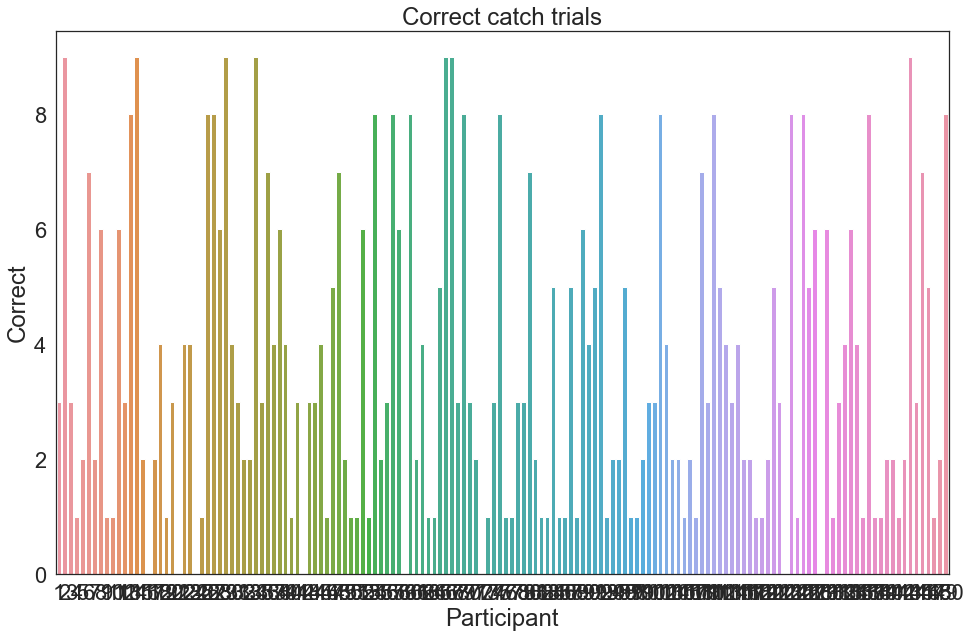

In [295]:
sns.set(style="white",font_scale=2)
plt.figure(figsize=(16, 10))
sns.barplot(x='Participant',y='Correct',data=catch_trials)
plt.title('Correct catch trials')

Text(0.5, 1.0, 'Mean number of points won in main trials')

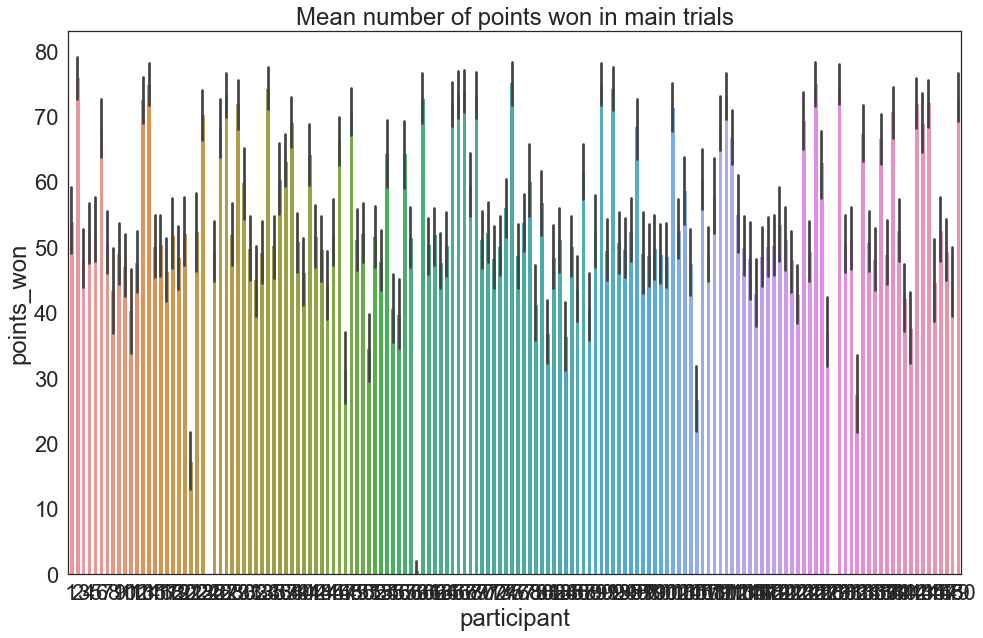

In [296]:
sns.set(style="white",font_scale=2)
plt.figure(figsize=(16, 10))
sns.barplot(x='participant',y='points_won',data=main_data)
plt.title('Mean number of points won in main trials')

In [297]:
## I'm going to exclude participants who were bad on catch trials AND all trials in general
catch_trials['Overall_Accuracy']=0
for i in subjects:
    catch_trials.loc[i-1,'Overall_Accuracy']=mean(main_data[main_data['participant']==i]['points_won'])
    
catch_trials['Exclude']=0
for i in subjects:
    if (catch_trials.loc[i-1,'Correct']<6) & (catch_trials.loc[i-1,'Overall_Accuracy']<50):
        catch_trials.loc[i-1,'Exclude']=1

In [298]:
# list of good subjects
subjects_excl = list(catch_trials[catch_trials['Exclude']==0]['Participant'])

In [299]:
len(subjects_excl)

96

Text(0.5, 1.0, 'Mean number of points won in main trials')

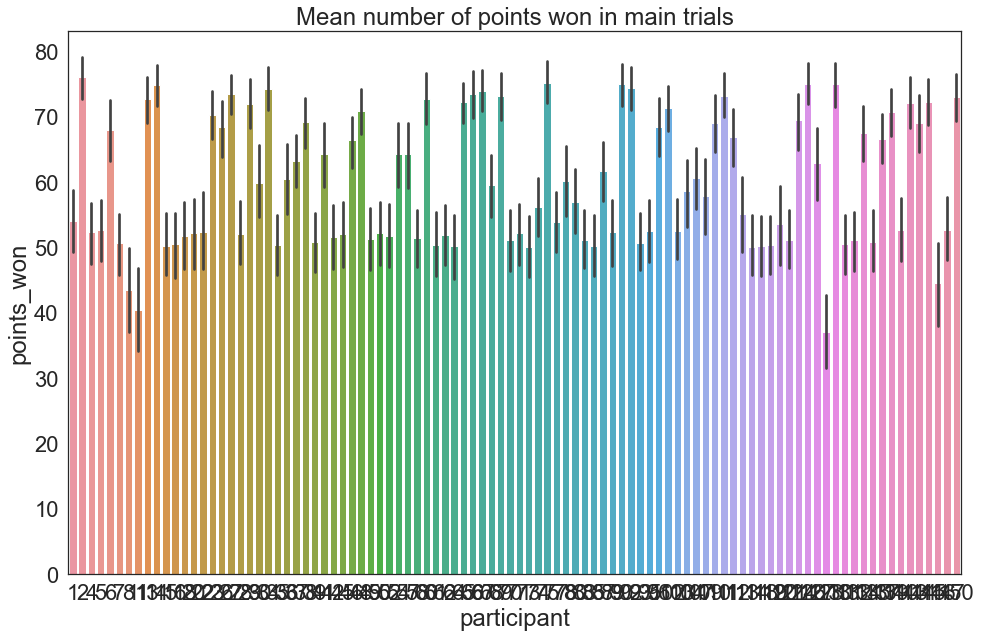

In [300]:
sns.set(style="white",font_scale=2)
plt.figure(figsize=(16, 10))
df1 = pd.DataFrame(data=[])
df1 ['participant'] = main_data[main_data['participant'].isin(subjects_excl)].participant
df1['points_won'] = main_data[main_data['participant'].isin(subjects_excl)].points_won
sns.barplot(x='participant',y='points_won',data=df1)
plt.title('Mean number of points won in main trials')

Text(0.5, 1.0, 'Correct catch trials')

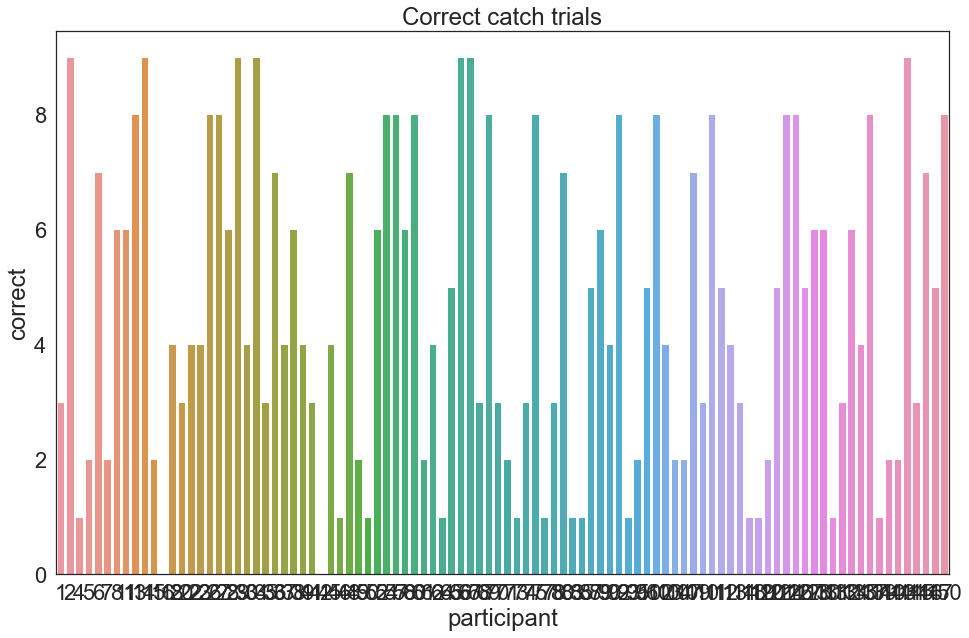

In [301]:
sns.set(style="white",font_scale=2)
plt.figure(figsize=(16, 10))
df1 = pd.DataFrame(data=[])
df1 ['participant'] = catch_trials[catch_trials['Participant'].isin(subjects_excl)].Participant
df1['correct'] = catch_trials[catch_trials['Participant'].isin(subjects_excl)].Correct
sns.barplot(x='participant',y='correct',data=df1)
plt.title('Correct catch trials')


In [312]:
main_data['sample_keypresses1']=main_data['key_resp_21.sample1']
main_data['known_val1']=nan
main_data['known_val2']=nan
main_data['known_val3']=nan

main_data['sample_keypresses2'] = main_data['sample_keypress2']
main_data['known_val1_sample2']=main_data.loc[row, 'known_val1']
main_data['known_val2_sample2']=main_data.loc[row, 'known_val2']
main_data['known_val3_sample2']=main_data.loc[row, 'known_val3']

main_data['sample_keypresses3'] = main_data['sample_keypress3']
main_data['known_val1_sample3']=main_data.loc[row,'known_val1_sample2']
main_data['known_val2_sample3']=main_data.loc[row, 'known_val2_sample2']
main_data['known_val3_sample3']=main_data.loc[row, 'known_val3_sample2']

In [313]:
for row,row_id in enumerate(main_data.values):
    if main_data.loc[row,'trial']!=0:
        for balloon in range(3):
            main_data.loc[row,'known_val%s' % (balloon+1)]=main_data.loc[row-1,'known_val%s' % (balloon+1)]
        if main_data.loc[row-1, 'sample_keypresses3']=='q':
            main_data.loc[row, 'known_val1']=main_data.loc[row-1, 'balloon1']
            main_data.loc[row, 'known_val2']=main_data.loc[row-1, 'balloon2']
            main_data.loc[row, 'known_val3']=main_data.loc[row-1, 'balloon3']
        elif main_data.loc[row-1, 'sample_keypresses3']=='w':
            main_data.loc[row, 'known_val1']=main_data.loc[row-1, 'balloon1']
            main_data.loc[row, 'known_val2']=main_data.loc[row-1, 'balloon2']
            main_data.loc[row, 'known_val3']=main_data.loc[row-1, 'balloon3']
        elif main_data.loc[row-1, 'sample_keypresses3']=='e':
            main_data.loc[row, 'known_val1']=main_data.loc[row-1, 'balloon1']
            main_data.loc[row, 'known_val2']=main_data.loc[row-1, 'balloon2']
            main_data.loc[row, 'known_val3']=main_data.loc[row-1, 'balloon3']
        else:
            if main_data.loc[row-1, 'sample_keypresses2'] == 'q':
                main_data.loc[row, 'known_val1']=main_data.loc[row-1, 'balloon1']
                if main_data.loc[row-1, 'sample_keypresses1']=='w':
                    main_data.loc[row, 'known_val2']=main_data.loc[row-1, 'balloon2']
                    main_data.loc[row, 'known_val3']=main_data.loc[row-1,'known_val3']
                elif main_data.loc[row-1, 'sample_keypresses1']=='e':
                    main_data.loc[row, 'known_val2']=main_data.loc[row-1, 'known_val2']
                    main_data.loc[row, 'known_val3']=main_data.loc[row-1, 'balloon3']
                    
            elif main_data.loc[row-1, 'sample_keypresses2']=='w':
                main_data.loc[row, 'known_val2']=main_data.loc[row-1, 'balloon2']
                if main_data.loc[row-1, 'sample_keypresses1']=='q':
                    main_data.loc[row, 'known_val1']=main_data.loc[row-1, 'balloon1']
                    main_data.loc[row, 'known_val3']=main_data.loc[row-1, 'known_val3']
                elif main_data.loc[row-1, 'sample_keypresses1']=='e':
                    main_data.loc[row, 'known_val1']=main_data.loc[row-1,'known_val1']
                    main_data.loc[row, 'known_val3']=main_data.loc[row-1, 'balloon3']
                    
            elif main_data.loc[row-1, 'sample_keypresses2']=='e':
                main_data.loc[row, 'known_val3']=main_data.loc[row-1, 'balloon3']
                if main_data.loc[row-1, 'sample_keypresses1']=='q':
                    main_data.loc[row, 'known_val1']=main_data.loc[row-1, 'balloon1']
                    main_data.loc[row, 'known_val2']=main_data.loc[row-1, 'known_val2']
                elif main_data.loc[row-1, 'sample_keypresses1']=='w':
                    main_data.loc[row, 'known_val1']=main_data.loc[row-1, 'known_val1']
                    main_data.loc[row, 'known_val2']=main_data.loc[row-1, 'balloon2']
                    
            else:
                if main_data.loc[row-1, 'sample_keypresses1']=='q':
                    main_data.loc[row, 'known_val1']=main_data.loc[row-1, 'balloon1']
                    main_data.loc[row, 'known_val2']=main_data.loc[row-1, 'known_val2']
                    main_data.loc[row, 'known_val3']=main_data.loc[row-1, 'known_val3']
                elif main_data.loc[row-1, 'sample_keypresses1']=='w':
                    main_data.loc[row, 'known_val1']=main_data.loc[row-1, 'known_val1']
                    main_data.loc[row, 'known_val2']=main_data.loc[row-1, 'balloon2']
                    main_data.loc[row, 'known_val3']=main_data.loc[row-1, 'known_val3']
                elif main_data.loc[row-1, 'sample_keypresses1']=='e':
                    main_data.loc[row, 'known_val1']=main_data.loc[row-1, 'known_val1']
                    main_data.loc[row, 'known_val2']=main_data.loc[row-1, 'known_val2']
                    main_data.loc[row, 'known_val3']=main_data.loc[row-1, 'balloon3']
                else:
                    main_data.loc[row, 'known_val1']=main_data.loc[row-1, 'known_val1']
                    main_data.loc[row, 'known_val2']=main_data.loc[row-1, 'known_val2']
                    main_data.loc[row, 'known_val3']=main_data.loc[row-1, 'known_val3']
                
            
        for balloon in range(3):
            if main_data.loc[row,'reset']==1:
                main_data.loc[row,'known_val%s' % (balloon+1)]=nan
            elif main_data.loc[row,'reveal']==1:
                main_data.loc[row,'known_val%s' % (balloon+1)]=main_data.loc[row,'balloon%s' % (balloon+1)]

In [314]:
for row,row_id in enumerate(main_data.values):
    if main_data.loc[row,'trial']>=0:
        for balloon in range(3):
            main_data.loc[row,'known_val%s_sample2' % (balloon+1)]=main_data.loc[row,'known_val%s_sample2' % (balloon+1)]
        if main_data.loc[row,'sample_keypresses1'] == 'q':
            main_data.loc[row, 'known_val1_sample2']=main_data.loc[row, 'balloon1']
            main_data.loc[row, 'known_val2_sample2']=main_data.loc[row, 'known_val2']
            main_data.loc[row, 'known_val3_sample2']=main_data.loc[row, 'known_val3']
        elif main_data.loc[row, 'sample_keypresses1'] == 'w':
            main_data.loc[row, 'known_val1_sample2'] = main_data.loc[row, 'known_val1']
            main_data.loc[row, 'known_val2_sample2'] = main_data.loc[row, 'balloon2']
            main_data.loc[row, 'known_val3_sample2'] = main_data.loc[row, 'known_val3']
        elif main_data.loc[row, 'sample_keypresses1'] == 'e':
            main_data.loc[row, 'known_val1_sample2'] = main_data.loc[row, 'known_val1']
            main_data.loc[row, 'known_val2_sample2'] = main_data.loc[row, 'known_val2']
            main_data.loc[row, 'known_val3_sample2'] = main_data.loc[row, 'balloon3']
        else:
            main_data.loc[row, 'known_val1_sample2']=main_data.loc[row, 'known_val1']
            main_data.loc[row, 'known_val2_sample2']=main_data.loc[row, 'known_val2']
            main_data.loc[row, 'known_val3_sample2']=main_data.loc[row, 'known_val3']

In [315]:
for row,row_id in enumerate(main_data.values):
    if main_data.loc[row,'trial']>=0:
        for balloon in range(3):
            main_data.loc[row,'known_val%s_sample3' % (balloon+1)]=main_data.loc[row,'known_val%s_sample3' % (balloon+1)]
        if main_data.loc[row,'sample_keypresses2'] == 'q':
            main_data.loc[row, 'known_val1_sample3']=main_data.loc[row, 'balloon1']
            main_data.loc[row, 'known_val2_sample3']=main_data.loc[row, 'known_val2_sample2']
            main_data.loc[row, 'known_val3_sample3']=main_data.loc[row, 'known_val3_sample2']
        elif main_data.loc[row, 'sample_keypresses2'] == 'w':
            main_data.loc[row, 'known_val1_sample3'] = main_data.loc[row, 'known_val1_sample2']
            main_data.loc[row, 'known_val2_sample3'] = main_data.loc[row, 'balloon2']
            main_data.loc[row, 'known_val3_sample3'] = main_data.loc[row, 'known_val3_sample2']
        elif main_data.loc[row, 'sample_keypresses2'] == 'e':
            main_data.loc[row, 'known_val1_sample3'] = main_data.loc[row, 'known_val1_sample2']
            main_data.loc[row, 'known_val2_sample3'] = main_data.loc[row, 'known_val2_sample2']
            main_data.loc[row, 'known_val3_sample3'] = main_data.loc[row, 'balloon3']
        elif main_data.loc[row, 'sample_keypresses2'] == 'space':
            main_data.loc[row, 'known_val1_sample3']=main_data.loc[row, 'known_val1_sample2']
            main_data.loc[row, 'known_val2_sample3']=main_data.loc[row, 'known_val2_sample2']
            main_data.loc[row, 'known_val3_sample3']=main_data.loc[row, 'known_val3_sample2']
        else:
            main_data.loc[row, 'known_val1_sample3']=main_data.loc[row, 'known_val1_sample2']
            main_data.loc[row, 'known_val2_sample3']=main_data.loc[row, 'known_val2_sample2']
            main_data.loc[row, 'known_val3_sample3']=main_data.loc[row, 'known_val3_sample2']

In [319]:
pd.set_option('display.max_columns', 36)
main_data[1950:1960]

,key_resp_21.sample1,sample_rt1,sample_keypress2,sample_rt2,sample_keypress3,sample_rt3,choice_keypress,choice_rt,participant,trial,reverse_order,balloon1,balloon2,balloon3,reset,reveal,mean_val_gold,points_won,sample_keypresses1,known_val1,known_val2,known_val3,sample_keypresses2,known_val1_sample2,known_val2_sample2,known_val3_sample2,sample_keypresses3,known_val1_sample3,known_val2_sample3,known_val3_sample3
1950,q,5.531295,NaN,0.854820,NaN,NaN,q,1.068485,14,0,0.0,99.0,76.0,31.0,0.0,0.0,68.666667,99.0,q,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,99.0,NaN,NaN
1951,w,2.402360,NaN,1.147580,NaN,NaN,w,1.764430,14,1,0.0,23.0,90.0,40.0,0.0,0.0,51.000000,90.0,w,99.0,NaN,NaN,NaN,99.0,90.0,NaN,NaN,99.0,90.0,NaN
1952,e,2.328075,q,1.614090,space,1.560625,e,0.800055,14,2,0.0,49.0,13.0,51.0,0.0,0.0,37.666667,51.0,e,99.0,90.0,NaN,q,99.0,90.0,51.0,space,49.0,90.0,51.0
1953,NaN,5.300965,NaN,NaN,NaN,NaN,q,0.876785,14,3,0.0,78.0,26.0,55.0,0.0,0.0,53.000000,78.0,NaN,49.0,90.0,51.0,NaN,49.0,90.0,51.0,NaN,49.0,90.0,51.0
1954,w,5.663640,NaN,1.255045,NaN,NaN,e,0.606705,14,4,0.0,13.0,49.0,56.0,0.0,0.0,39.333333,56.0,w,49.0,90.0,51.0,NaN,49.0,49.0,51.0,NaN,49.0,49.0,51.0
1955,q,4.528755,w,0.353770,e,0.436675,q,0.812200,14,5,0.0,80.0,26.0,78.0,1.0,0.0,61.333333,80.0,q,NaN,NaN,NaN,w,80.0,NaN,NaN,e,80.0,26.0,NaN
1956,NaN,3.832975,NaN,NaN,NaN,NaN,e,0.675560,14,6,0.0,10.0,51.0,89.0,0.0,0.0,50.000000,89.0,NaN,80.0,26.0,78.0,NaN,80.0,26.0,78.0,NaN,80.0,26.0,78.0
1957,e,7.584570,NaN,0.811485,NaN,NaN,e,0.614695,14,7,0.0,43.0,66.0,95.0,0.0,0.0,68.000000,95.0,e,80.0,26.0,78.0,NaN,80.0,26.0,95.0,NaN,80.0,26.0,95.0
1958,w,1.310170,q,2.198870,e,0.478770,e,0.741480,14,8,0.0,76.0,77.0,100.0,0.0,0.0,84.333333,100.0,w,80.0,26.0,95.0,q,80.0,77.0,95.0,e,76.0,77.0,95.0
1959,NaN,5.680710,NaN,NaN,NaN,NaN,w,0.538425,14,9,0.0,7.0,90.0,13.0,0.0,0.0,36.666667,90.0,NaN,76.0,77.0,100.0,NaN,76.0,77.0,100.0,NaN,76.0,77.0,100.0
